# Step 1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import ast

# Step 2: Load the dataset from CSV file

In [3]:
csv_file_path = '/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv'  # Update with your CSV file path
df = pd.read_csv(csv_file_path)

In [4]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [6]:
df.shape

(6392, 19)

# Step 3: Preprocessing the image paths

In [7]:
# This step is appending the full file path to the left and right fundus images for each entry in DataFrame 
image_dir = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images'  # Update with your images directory
df['Left-Fundus'] = df['Left-Fundus'].apply(lambda x: os.path.join(image_dir, x))
df['Right-Fundus'] = df['Right-Fundus'].apply(lambda x: os.path.join(image_dir, x))

In [8]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


# Step 4: Filter dataset to include only rows where both images exist

In [9]:
df = df[df['Left-Fundus'].apply(os.path.exists) & df['Right-Fundus'].apply(os.path.exists)]

In [10]:
df.shape

(6068, 19)

# Step 5: Prepare input (X) and output (y) data

In [11]:
X = []  # List to store image data
y = []  # List to store labels

In [12]:
disease_labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
label_mapping = {label: idx for idx, label in enumerate(disease_labels)}

In [13]:
# Iterate through each row to process images and labels
for _, row in df.iterrows():
    left_img = cv2.imread(row['Left-Fundus'])
    right_img = cv2.imread(row['Right-Fundus'])
    
    # Resize images to 128x128
    left_img = cv2.resize(left_img, (128, 128))
    right_img = cv2.resize(right_img, (128, 128))
    
    # Stack left and right images to create a two-channel input
    combined_img = np.concatenate((left_img, right_img), axis=-1)  # Combine channels
    
    # Append the image to X
    X.append(combined_img)
    
    # Step 8: Create a target vector (one-hot encoding) for labels
    target_vector = np.zeros(len(disease_labels))
    labels = ast.literal_eval(row['labels'])  # Safely evaluate string to list
    
    for label in labels:
        target_vector[label_mapping[label]] = 1  # Assign 1 for each disease in the label list
    
    y.append(target_vector)

# Convert lists to numpy arrays and normalize images

In [14]:
X = np.array(X, dtype='float32') / 255.0  # Normalize pixel values between 0 and 1
y = np.array(y)

In [15]:
# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Print dataset shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (4854, 128, 128, 6)
y_train shape: (4854, 8)
x_test shape: (1214, 128, 128, 6)
y_test shape: (1214, 8)


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, BatchNormalization
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 6)))  # Input layer (128x128 image with 6 channels for both eyes)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # Flatten output to feed into Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(len(disease_labels), activation='softmax'))  # Output layer for multi-class classification

In [31]:
#  Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Set up checkpoints 
checkpoint = ModelCheckpoint('model_best.keras', monitor='val_accuracy', save_best_only=True)


In [33]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=35,
                    validation_data=(x_test, y_test),
                    verbose=1, callbacks=[checkpoint])  


Epoch 1/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.4166 - loss: 1.6909 - val_accuracy: 0.4366 - val_loss: 1.5323
Epoch 2/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4540 - loss: 1.5579 - val_accuracy: 0.4465 - val_loss: 1.4971
Epoch 3/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4453 - loss: 1.5108 - val_accuracy: 0.4357 - val_loss: 1.4659
Epoch 4/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4488 - loss: 1.4615 - val_accuracy: 0.4580 - val_loss: 1.4340
Epoch 5/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4502 - loss: 1.4186 - val_accuracy: 0.4629 - val_loss: 1.3780
Epoch 6/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4694 - loss: 1.4073 - val_accuracy: 0.4761 - val_loss: 1.3726
Epoch 7/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4673 - loss: 1.3479 - val_accuracy: 0.4819 - val_loss: 1.3466
Epoch 8/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4866 - loss: 1.2948 - val_acc

In [34]:
# Save the final model
model.save('final_model.keras')

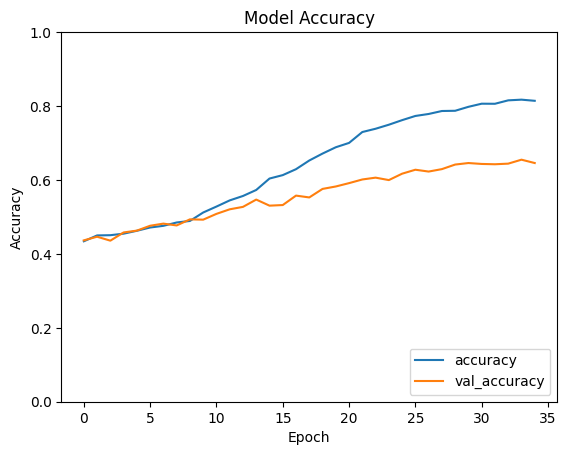

In [35]:
# Step 16: Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


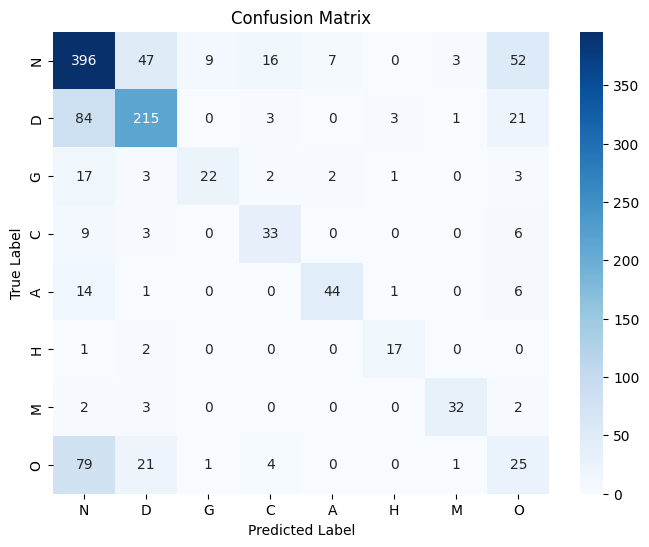

In [36]:
# Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert predicted probabilities into class labels (get the class with highest probability)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=disease_labels, yticklabels=disease_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [37]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on test data
y_pred = model.predict(x_test)

# Convert predictions and true labels back to single label by taking the index of the maximum value
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report (includes precision, recall, F1-score)
report = classification_report(y_test_labels, y_pred_labels, target_names=disease_labels)
print("Classification Report:\n", report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.6458
Classification Report:
               precision    recall  f1-score   support

           N       0.66      0.75      0.70       530
           D       0.73      0.66      0.69       327
           G       0.69      0.44      0.54        50
           C       0.57      0.65      0.61        51
           A       0.83      0.67      0.74        66
           H       0.77      0.85      0.81        20
           M       0.86      0.82      0.84        39
           O       0.22      0.19      0.20       131

    accuracy                           0.65      1214
   macro avg       0.67      0.63      0.64      1214
weighted avg       0.64      0.65      0.64      1214



In [38]:
# Calculate per-class accuracy
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Display per-class accuracy
for idx, label in enumerate(disease_labels):
    print(f"Accuracy for class {label}: {per_class_accuracy[idx] * 100:.2f}%")


Accuracy for class N: 74.72%
Accuracy for class D: 65.75%
Accuracy for class G: 44.00%
Accuracy for class C: 64.71%
Accuracy for class A: 66.67%
Accuracy for class H: 85.00%
Accuracy for class M: 82.05%
Accuracy for class O: 19.08%


In [39]:
import numpy as np
import cv2
from keras.models import load_model

# Step 1: Load the saved model
model = load_model('final_model.keras')

# Disease labels mapping
disease_labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

# Step 2: Function to preprocess the images
def preprocess_images(left_image_path, right_image_path):
    # Load the left and right fundus images
    left_img = cv2.imread(left_image_path)
    right_img = cv2.imread(right_image_path)
    
    # Resize images to the same size used during training (128x128)
    left_img = cv2.resize(left_img, (128, 128))
    right_img = cv2.resize(right_img, (128, 128))
    
    # Normalize the images (convert pixel values to range [0, 1])
    left_img = left_img.astype('float32') / 255.0
    right_img = right_img.astype('float32') / 255.0
    
    # Stack the left and right images along the channel axis to create a 6-channel input
    combined_img = np.concatenate((left_img, right_img), axis=-1)
    
    # Add an extra dimension to make it batch-like (1, 128, 128, 6) for prediction
    combined_img = np.expand_dims(combined_img, axis=0)
    
    return combined_img

# Step 3: Function to make predictions
def predict_disease(left_image_path, right_image_path):
    # Preprocess the images
    input_data = preprocess_images(left_image_path, right_image_path)
    
    # Step 4: Make predictions using the loaded model
    prediction = model.predict(input_data)
    
    # Step 5: Get the index of the highest probability (predicted class)
    predicted_label_idx = np.argmax(prediction, axis=1)[0]
    
    # Map the predicted index to the corresponding disease label
    predicted_disease = disease_labels[predicted_label_idx]
    
    # Get the confidence level for the predicted class
    confidence_score = prediction[0][predicted_label_idx]  # Confidence for the predicted class
    
    return predicted_disease, confidence_score, prediction[0]  # Return probabilities for all classes

# Step 6: Example usage
left_image_path = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1277_left.jpg'   # Update with the actual path
right_image_path = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1277_right.jpg'  # Update with the actual path

predicted_result, confidence, probabilities = predict_disease(left_image_path, right_image_path)

# Output the results
print(f"Predicted Disease: {predicted_result}")
print(f"Confidence: {confidence:.2f}")  # Display confidence as a percentage
print("Probabilities for all classes:")
for label, prob in zip(disease_labels, probabilities):
    print(f"{label}: {prob:.2f}")  # Display probabilities as decimals


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
Predicted Disease: G
Confidence: 0.95
Probabilities for all classes:
N: 0.04
D: 0.01
G: 0.95
C: 0.00
A: 0.00
H: 0.00
M: 0.00
O: 0.00


In [40]:
import pandas as pd

# Load the CSV file
csv_file_path = '/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv'  # Update with your CSV file path
df = pd.read_csv(csv_file_path)

# Print the first row of the dataset
print(df.iloc[1042])


ID                                                                        1277
Patient Age                                                                 74
Patient Sex                                                               Male
Left-Fundus                                                      1277_left.jpg
Right-Fundus                                                    1277_right.jpg
Left-Diagnostic Keywords                      glaucoma，intraretinal hemorrhage
Right-Diagnostic Keywords                                             glaucoma
N                                                                            0
D                                                                            0
G                                                                            1
C                                                                            0
A                                                                            0
H                                                   

# SOME MORE MODELS

In [ ]:
pip install tensorflow keras


In [63]:
from tensorflow.keras.applications import DenseNet121

# Define DenseNet121 model (without the top fully connected layers)
def get_densenet_model(input_shape, num_classes):
    densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(densenet_base)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    return model

# Train DenseNet121 model
densenet_model = get_densenet_model((128, 128, 3), len(disease_labels))
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_history = densenet_model.fit(x_train[:, :, :, :3], y_train, batch_size=32, epochs=15, validation_data=(x_test[:, :, :, :3], y_test), verbose=1)

# Get validation accuracy
densenet_accuracy = densenet_history.history['val_accuracy'][-1]

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 182s 484ms/step - accuracy: 0.3947 - loss: 1.8065 - val_accuracy: 0.3558 - val_loss: 1.7990
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 0.4839 - loss: 1.3939 - val_accuracy: 0.4366 - val_loss: 1.4251
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.4927 - loss: 1.3701 - val_accuracy: 0.4794 - val_loss: 1.3312
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.5080 - loss: 1.2892 - val_accuracy: 0.4868 - val_loss: 1.3437
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.5099 - loss: 1.2659 - val_accuracy: 0.4316 - val_loss: 1.4947
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.5278 - loss: 1.2372 - val_accuracy: 0.4769 - val_loss: 1.3957
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.5370 - loss: 1.1598 - val_accuracy: 0.4843 - val_loss: 1.3492
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.5328 - loss: 1.1959 

In [64]:
# Step 1: Make predictions on the test set using DenseNet121
y_pred_densenet = densenet_model.predict(x_test[:, :, :, :3])
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)
y_true_classes_densenet = np.argmax(y_test, axis=1)

# Step 2: Generate confusion matrix
conf_matrix_densenet = confusion_matrix(y_true_classes_densenet, y_pred_classes_densenet)

# Step 3: Calculate per-class accuracy
per_class_accuracy_densenet = conf_matrix_densenet.diagonal() / conf_matrix_densenet.sum(axis=1)

# Display per-class accuracy for DenseNet121
print("DenseNet121 Model - Per-Class Accuracy:")
for idx, label in enumerate(disease_labels):
    print(f"Accuracy for class {label}: {per_class_accuracy_densenet[idx] * 100:.2f}%")

38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step
DenseNet121 Model - Per-Class Accuracy:
Accuracy for class N: 57.36%
Accuracy for class D: 66.36%
Accuracy for class G: 56.00%
Accuracy for class C: 50.98%
Accuracy for class A: 39.39%
Accuracy for class H: 20.00%
Accuracy for class M: 69.23%
Accuracy for class O: 0.00%


In [52]:
from tensorflow.keras.applications import ResNet50

# Define ResNet50 model (without the top fully connected layers)
def get_resnet50_model(input_shape, num_classes):
    resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(resnet50_base)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    return model

# Train ResNet50 model
resnet50_model = get_resnet50_model((128, 128, 3), len(disease_labels))
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_history = resnet50_model.fit(x_train[:, :, :, :3], y_train, batch_size=32, epochs=15, validation_data=(x_test[:, :, :, :3], y_test), verbose=1)

resnet50_accuracy = resnet50_history.history['val_accuracy'][-1]

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 81s 211ms/step - accuracy: 0.4054 - loss: 1.8071 - val_accuracy: 0.0420 - val_loss: 9.9041
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.4715 - loss: 1.4374 - val_accuracy: 0.4366 - val_loss: 2.5432
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.4842 - loss: 1.3660 - val_accuracy: 0.4259 - val_loss: 1.8782
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.4929 - loss: 1.3138 - val_accuracy: 0.0470 - val_loss: 2.3398
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.5038 - loss: 1.2556 - val_accuracy: 0.4432 - val_loss: 1.5943
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.5092 - loss: 1.2155 - val_accuracy: 0.3649 - val_loss: 1.8667
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.5400 - loss: 1.1521 - val_accuracy: 0.3591 - val_loss: 1.6643
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.5728 - loss: 1.0881 -

In [53]:
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions on the test set using ResNet50
y_pred_resnet50 = resnet50_model.predict(x_test[:, :, :, :3])
y_pred_classes_resnet50 = np.argmax(y_pred_resnet50, axis=1)
y_true_classes_resnet50 = np.argmax(y_test, axis=1)

# Step 2: Generate confusion matrix
conf_matrix_resnet50 = confusion_matrix(y_true_classes_resnet50, y_pred_classes_resnet50)

# Step 3: Calculate per-class accuracy
per_class_accuracy_resnet50 = conf_matrix_resnet50.diagonal() / conf_matrix_resnet50.sum(axis=1)

# Display per-class accuracy for ResNet50
print("ResNet50 Model - Per-Class Accuracy:")
for idx, label in enumerate(disease_labels):
    print(f"Accuracy for class {label}: {per_class_accuracy_resnet50[idx] * 100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step
ResNet50 Model - Per-Class Accuracy:
Accuracy for class N: 70.57%
Accuracy for class D: 46.48%
Accuracy for class G: 22.00%
Accuracy for class C: 47.06%
Accuracy for class A: 30.30%
Accuracy for class H: 40.00%
Accuracy for class M: 56.41%
Accuracy for class O: 30.53%


In [48]:
from tensorflow.keras.applications import EfficientNetB0

# Define EfficientNetB0 model (without the top fully connected layers)
def get_efficientnet_model(input_shape, num_classes):
    efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(efficientnet_base)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    return model

# Train EfficientNet model
efficientnet_model = get_efficientnet_model((128, 128, 3), len(disease_labels))
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
efficientnet_history = efficientnet_model.fit(x_train[:, :, :, :3], y_train, batch_size=32, epochs=15, validation_data=(x_test[:, :, :, :3], y_test), verbose=1)

efficientnet_accuracy = efficientnet_history.history['val_accuracy'][-1]


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 136s 395ms/step - accuracy: 0.4216 - loss: 1.5782 - val_accuracy: 0.0420 - val_loss: 3.3278
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5320 - loss: 1.2513 - val_accuracy: 0.0420 - val_loss: 3.8167
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.5816 - loss: 1.1129 - val_accuracy: 0.1120 - val_loss: 2.0797
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.6493 - loss: 0.9666 - val_accuracy: 0.0535 - val_loss: 3.4644
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.6963 - loss: 0.8354 - val_accuracy: 0.4662 - val_loss: 1.6127
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7307 - loss: 0.7419 - val_accuracy: 0.4662 - val_loss: 1.6573
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.7477 - loss: 0.7047 - val_accuracy: 0.3707 - val_loss: 2.1792
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 

In [51]:
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions on the test set using EfficientNetB0
y_pred_efficientnet = efficientnet_model.predict(x_test[:, :, :, :3])
y_pred_classes_efficientnet = np.argmax(y_pred_efficientnet, axis=1)
y_true_classes_efficientnet = np.argmax(y_test, axis=1)

# Step 2: Generate confusion matrix
conf_matrix_efficientnet = confusion_matrix(y_true_classes_efficientnet, y_pred_classes_efficientnet)

# Step 3: Calculate per-class accuracy
per_class_accuracy_efficientnet = conf_matrix_efficientnet.diagonal() / conf_matrix_efficientnet.sum(axis=1)

# Display per-class accuracy for EfficientNetB0
print("EfficientNetB0 Model - Per-Class Accuracy:")
for idx, label in enumerate(disease_labels):
    print(f"Accuracy for class {label}: {per_class_accuracy_efficientnet[idx] * 100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
EfficientNetB0 Model - Per-Class Accuracy:
Accuracy for class N: 71.32%
Accuracy for class D: 65.75%
Accuracy for class G: 40.00%
Accuracy for class C: 84.31%
Accuracy for class A: 69.70%
Accuracy for class H: 65.00%
Accuracy for class M: 71.79%
Accuracy for class O: 17.56%


In [65]:
from sklearn.metrics import classification_report, accuracy_score

# Function to evaluate the model and print the accuracy, precision, and recall
def evaluate_model(model, x_test, y_test, model_name):
    # Step 1: Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # Convert predicted probabilities into class labels (get the class with the highest probability)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Step 2: Calculate accuracy
    accuracy = accuracy_score(y_true_classes, y_pred_classes)

    # Step 3: Generate classification report (gives precision, recall, and f1-score for each class)
    class_report = classification_report(y_true_classes, y_pred_classes, target_names=disease_labels, output_dict=True)

    # Extract precision, recall, and f1-score from the report
    precision = class_report['weighted avg']['precision']
    recall = class_report['weighted avg']['recall']

    # Step 4: Print the results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")

    return accuracy, precision, recall

# Evaluate the Custom CNN
custom_cnn_acc, custom_cnn_prec, custom_cnn_recall = evaluate_model(model, x_test, y_test, "Custom CNN")

# Evaluate ResNet50
resnet50_acc, resnet50_prec, resnet50_recall = evaluate_model(resnet50_model, x_test[:, :, :, :3], y_test, "ResNet50")

# Evaluate EfficientNetB0
efficientnet_acc, efficientnet_prec, efficientnet_recall = evaluate_model(efficientnet_model, x_test[:, :, :, :3], y_test, "EfficientNetB0")

# Evaluate DenseNet121
densenet_acc, densenet_prec, densenet_recall = evaluate_model(densenet_model, x_test[:, :, :, :3], y_test, "DenseNet121")

# Store all the results in a dictionary for comparison
model_results = {
    'Custom CNN': (custom_cnn_acc, custom_cnn_prec, custom_cnn_recall),
    'EfficientNetB0': (efficientnet_acc, efficientnet_prec, efficientnet_recall),
    'ResNet50': (resnet50_acc, resnet50_prec, resnet50_recall),
    'DenseNet121': (densenet_acc, densenet_prec, densenet_recall)
}

# Print all results
print("\nComparison of Models:")
for model_name, metrics in model_results.items():
    print(f"{model_name} - Accuracy: {metrics[0] * 100:.2f}%, Precision: {metrics[1] * 100:.2f}%, Recall: {metrics[2] * 100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Custom CNN Results:
Accuracy: 64.58%
Precision: 64.48%
Recall: 64.58%
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

ResNet50 Results:
Accuracy: 53.62%
Precision: 60.52%
Recall: 53.62%
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

EfficientNetB0 Results:
Accuracy: 63.10%
Precision: 62.74%
Recall: 63.10%
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

DenseNet121 Results:
Accuracy: 52.06%
Precision: 50.21%
Recall: 52.06%

Comparison of Models:
Custom CNN - Accuracy: 64.58%, Precision: 64.48%, Recall: 64.58%
EfficientNetB0 - Accuracy: 63.10%, Precision: 62.74%, Recall: 63.10%
ResNet50 - Accuracy: 53.62%, Precision: 60.52%, Recall: 53.62%
DenseNet121 - Accuracy: 52.06%, Precision: 50.21%, Recall: 52.06%


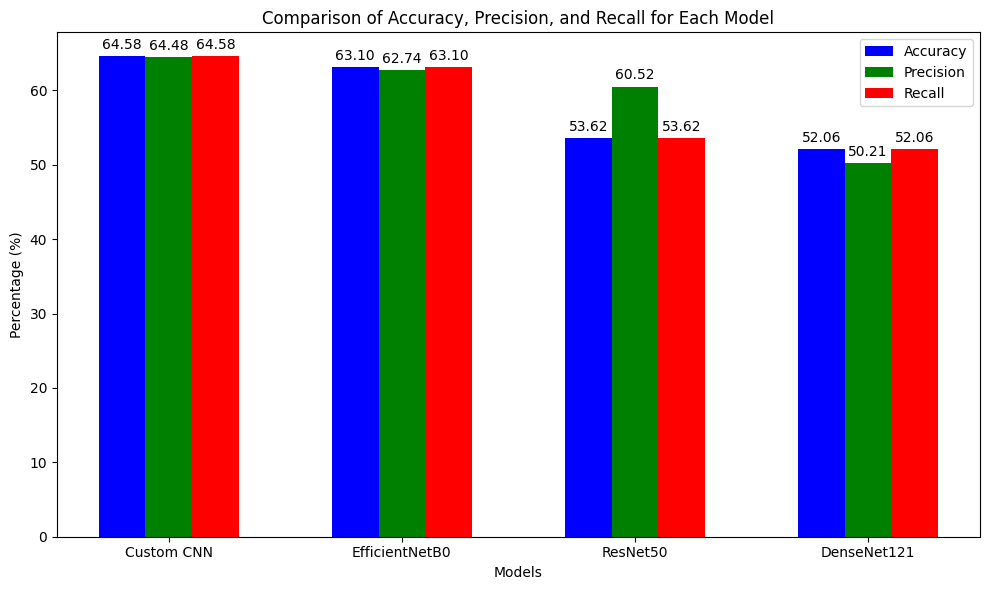

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting accuracy, precision, and recall for each model
model_names = list(model_results.keys())
accuracies = [metrics[0] * 100 for metrics in model_results.values()]
precisions = [metrics[1] * 100 for metrics in model_results.values()]
recalls = [metrics[2] * 100 for metrics in model_results.values()]

# Define positions of the bars for each metric
x = np.arange(len(model_names))  # label locations
width = 0.2  # the width of the bars

# Create subplots for grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for accuracy, precision, and recall
bars1 = ax.bar(x - width, accuracies, width, label='Accuracy', color='blue')
bars2 = ax.bar(x, precisions, width, label='Precision', color='green')
bars3 = ax.bar(x + width, recalls, width, label='Recall', color='red')

# Adding labels, title, and customizing ticks
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Accuracy, Precision, and Recall for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Annotating the bars with the exact values for better visualization
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

# Annotate each group of bars
annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)

# Show the plot
plt.tight_layout()
plt.show()
